In [1]:
import numpy as np
import astropy.io.fits as fits
import astropy.units as u
from IPython.display import clear_output
import time

from scipy.ndimage import rotate
from scipy.interpolate import RegularGridInterpolator
import h5py
import os
from pathlib import Path
import glob

import misc
from matplotlib.patches import Circle
from importlib import reload
reload(misc)

data_dir = Path('/groups/douglase/kians-data-files/disk-processing/')

wavelength_c = 575e-9*u.m
D = 2.3631*u.m
mas_per_lamD = (wavelength_c/D*u.radian).to(u.mas)

# define desired PSF dimensions and pixelscale in units of lambda/D
npsf = 64
psf_pixelscale = 13e-6
psf_pixelscale_lamD = 500/575 * 1/2
psf_pixelscale_mas = psf_pixelscale_lamD*mas_per_lamD/u.pix

polaxis = 10

ndisk = 128
disk_pixelscale_mas = 10.5*u.mas/u.pix
disk_pixelscale_lamD = (disk_pixelscale_mas/mas_per_lamD).value

band1_wavelength = 575e-9*u.m
iwa_band1 = 2.8
owa_band1 = 9.7

iwa = iwa_band1 * wavelength_c/band1_wavelength
owa = owa_band1 * wavelength_c/band1_wavelength

iwa_mas = iwa*mas_per_lamD
owa_mas = owa*mas_per_lamD

disk_fpaths = sorted(glob.glob(str(data_dir/'disks'/'Debes_Models_07_2022'/'*')))
len(disk_fpaths)

110

# Do the matrix multiplication

In [2]:
ipsf_fpath = data_dir/'ipsfs'/'hlc_band1_ipsfs_072022.hdf5'
f = h5py.File(ipsf_fpath, 'r')
ipsf_matrix = np.array(f['ipsf_matrix'])
f.close()

In [5]:
Path(fname).stem

'annulus_inc0_r0.10'

In [4]:
images_dir = data_dir/'images'/'Debes_Models_072022_HLC_images'

import os
fname = os.path.basename(disk_fpaths[0])
str(images_dir/fname)

'/groups/douglase/kians-data-files/disk-processing/images/Debes_Models_072022_HLC_images/annulus_inc0_r0.10.fits'

In [6]:
for i,fpath in enumerate(disk_fpaths):
    fname = Path(os.path.basename(fpath)).stem + '_band1_sim.fits'
    
    disk = misc.pad_or_crop(fits.getdata(fpath), ndisk)
    image = np.reshape(ipsf_matrix.dot(disk.flatten()), (npsf,npsf))
    
    hdr = fits.Header()
    hdr['PXSCLAMD'] = psf_pixelscale_lamD
    hdr.comments['PXSCLAMD'] = 'pixel scale in lam0/D per pixel'
    hdr['PXSCLMAS'] = psf_pixelscale_mas.value
    hdr.comments['PXSCLMAS'] = 'pixel scale in mas per pixel'
    hdr['PIXELSCL'] = psf_pixelscale
    hdr.comments['PIXELSCL'] = 'pixel scale in meters per pixel'
    hdr['CWAVELEN'] = wavelength_c.value
    hdr.comments['CWAVELEN'] = 'central wavelength in meters'
    hdr['BANDPASS'] = 0.1
    hdr.comments['BANDPASS'] = 'bandpass as fraction of CWAVELEN'
    
    image_hdu = fits.PrimaryHDU(data=image, header=hdr)
    image_hdu.writeto(str(images_dir/fname), overwrite=True)
    print(i+1, str(images_dir/fname) )

1 /groups/douglase/kians-data-files/disk-processing/images/Debes_Models_072022_HLC_images/annulus_inc0_r0.10_band1_sim.fits
2 /groups/douglase/kians-data-files/disk-processing/images/Debes_Models_072022_HLC_images/annulus_inc0_r0.15_band1_sim.fits
3 /groups/douglase/kians-data-files/disk-processing/images/Debes_Models_072022_HLC_images/annulus_inc0_r0.20_band1_sim.fits
4 /groups/douglase/kians-data-files/disk-processing/images/Debes_Models_072022_HLC_images/annulus_inc0_r0.30_band1_sim.fits
5 /groups/douglase/kians-data-files/disk-processing/images/Debes_Models_072022_HLC_images/annulus_inc0_r0.40_band1_sim.fits
6 /groups/douglase/kians-data-files/disk-processing/images/Debes_Models_072022_HLC_images/annulus_inc0_r0.50_band1_sim.fits
7 /groups/douglase/kians-data-files/disk-processing/images/Debes_Models_072022_HLC_images/annulus_inc0_r0.60_band1_sim.fits
8 /groups/douglase/kians-data-files/disk-processing/images/Debes_Models_072022_HLC_images/annulus_inc0_r0.80_band1_sim.fits
9 /group

67 /groups/douglase/kians-data-files/disk-processing/images/Debes_Models_072022_HLC_images/ring_inc45_r0.60_band1_sim.fits
68 /groups/douglase/kians-data-files/disk-processing/images/Debes_Models_072022_HLC_images/ring_inc45_r0.80_band1_sim.fits
69 /groups/douglase/kians-data-files/disk-processing/images/Debes_Models_072022_HLC_images/ring_inc45_r1.00_band1_sim.fits
70 /groups/douglase/kians-data-files/disk-processing/images/Debes_Models_072022_HLC_images/ring_inc45_r1.20_band1_sim.fits
71 /groups/douglase/kians-data-files/disk-processing/images/Debes_Models_072022_HLC_images/ring_inc60_r0.10_band1_sim.fits
72 /groups/douglase/kians-data-files/disk-processing/images/Debes_Models_072022_HLC_images/ring_inc60_r0.15_band1_sim.fits
73 /groups/douglase/kians-data-files/disk-processing/images/Debes_Models_072022_HLC_images/ring_inc60_r0.20_band1_sim.fits
74 /groups/douglase/kians-data-files/disk-processing/images/Debes_Models_072022_HLC_images/ring_inc60_r0.30_band1_sim.fits
75 /groups/dougl

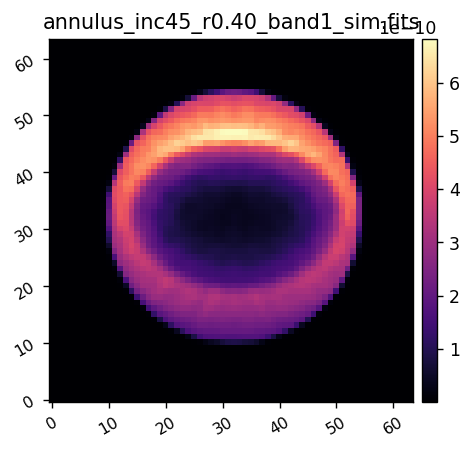

In [7]:
fname = Path(os.path.basename(disk_fpaths[20])).stem + '_band1_sim.fits'
image = fits.getdata(str(images_dir/fname))

misc.myimshow(image, fname)